In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('./')
import json
import os
from qiskit import QuantumCircuit
import numpy as np
from dataclasses import dataclass
from enum import auto, Enum
import matplotlib.pyplot as plt
import math
from dataclasses import dataclass
from component.sup_sys.algorithm_loader import load_algorithms
from component.a_backend.fake_backend import *
from component.sup_sys.backend_loader import load_backends
from qiskit.visualization import plot_error_map

@dataclass
class ResultOfSchedule:
    numcircuit: int
    nameAlgorithm: str
    averageQubits: float
    nameSchedule: str
    typeMachine: dict
    
    # Metrics
    average_turnaroundTime: float
    average_responseTime: float
    average_fidelity: float
    sampling_overhead: float
    average_throughput: float
    average_utilization: float
    scheduler_latency: float
    makespan: float
    
result_Schedule = ResultOfSchedule(
    numcircuit=0,
    nameAlgorithm="",
    averageQubits=0.0,
    nameSchedule="",
    typeMachine={},
    
    # Metrics
    average_turnaroundTime=0.0,
    average_responseTime=0.0,
    average_fidelity=0.0,
    sampling_overhead=0.0,
    average_throughput=0.0,
    average_utilization=0.0,
    scheduler_latency=0.0,
    makespan=0.0
)

load_algorithms()
result_Schedule.nameSchedule = "FFD"


backendlist = load_backends()
print(len(backendlist))
print(backendlist)

machines = {}
backend0 = FakeBelemV2()
backend1 = FakeManilaV2()

machines[backend0.name] = backend0
machines[backend1.name] = backend1
print(machines)
# plot_error_map(list(machines.values())[0], figsize=(10, 8))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
58
{'FakeAlgiers': 27, 'FakeAlmadenV2': 20, 'FakeArmonkV2': 1, 'FakeAthensV2': 5, 'FakeAuckland': 27, 'FakeBelemV2': 5, 'FakeBoeblingenV2': 20, 'FakeBogotaV2': 5, 'FakeBrisbane': 127, 'FakeBrooklynV2': 65, 'FakeBurlingtonV2': 5, 'FakeCairoV2': 27, 'FakeCambridgeV2': 28, 'FakeCasablancaV2': 7, 'FakeCusco': 127, 'FakeEssexV2': 5, 'FakeFractionalBackend': 5, 'FakeGeneva': 27, 'FakeGuadalupeV2': 16, 'FakeHanoiV2': 27, 'FakeJakartaV2': 7, 'FakeJohannesburgV2': 20, 'FakeKawasaki': 127, 'FakeKolkataV2': 27, 'FakeKyiv': 127, 'FakeKyoto': 127, 'FakeLagosV2': 7, 'FakeLimaV2': 5, 'FakeLondonV2': 5, 'FakeManhattanV2': 65, 'FakeManilaV2': 5, 'FakeMarrakesh': 156, 'FakeMelbourneV2': 15, 'FakeMontrealV2': 27, 'FakeMumbaiV2': 27, 'FakeNairobiV2': 7, 'FakeOsaka': 127, 'FakeOslo': 7, 'FakeOurenseV2': 5, 'FakeParisV2': 27, 'FakePeekskill': 27, 'FakePerth': 7, 'FakePoughkeepsieV2': 20, 'FakePrague': 33, 'FakeQuebec': 1

In [3]:
from component.b_benchmark.mqt_tool import benchmark_circuit, create_circuit
from component.sup_sys.job_info import JobInfo

# initialize the number of qubits and jobs
num_qubits_per_job = 2
num_jobs = 5
jobs = {}   

for i in range(num_jobs):
    job_id = str(i + 1)
    jobs[job_id] = num_qubits_per_job

# update to result_Schedule
result_Schedule.numcircuit = len(jobs)
result_Schedule.averageQubits = sum(jobs.values()) / len(jobs)

# generate circuits and job information
origin_job_info = {}

for job_name, num_qubits in jobs.items():
    circuit = create_circuit(num_qubits, job_name)
    result_Schedule.nameAlgorithm = "ghz"
    circuit.remove_final_measurements()
    origin_job_info[job_name] = JobInfo(
        job_name=job_name,
        qubits=circuit.num_qubits,
        machine=None,  # Placeholder for machine name
        capacity_machine=0,  # Placeholder for machine capacity
        start_time=0.0,  # Placeholder for start time
        duration=0.0,  # Placeholder for duration
        end_time=0.0,  # Placeholder for end time
        childrenJobs=None,  # Placeholder for child jobs
        circuit=circuit,
        result_cut=None,  # Placeholder for result cut
    )

for job in origin_job_info.values():
    job.print()
    
process_job_info = origin_job_info.copy()

Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 1
Circuit:            ┌───┐
q1_0: ─────┤ X ├
      ┌───┐└─┬─┘
q1_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 2
Circuit:            ┌───┐
q2_0: ─────┤ X ├
      ┌───┐└─┬─┘
q2_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 3
Circuit:            ┌───┐
q3_0: ─────┤ X ├
      ┌───┐└─┬─┘
q3_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: No

In [4]:
# Cutting the jobs into two parts with condition in process_job_info
from component.c_circuit_work.cutting.width_c import *

max_width = max(list(machines.values()), key=lambda x: x.num_qubits).num_qubits

for job_name, job_info in process_job_info.items():
    if job_info.qubits > max_width:
        job_info.childrenJobs = []
        cut_name, observable = greedy_cut(job_info.circuit, max_width)
        # print(observable)
        result_cut = gate_to_reduce_width(job_info.circuit, cut_name, observable)
        result_Schedule.sampling_overhead += result_cut.overhead
        for i, (subcircuit_name, subcircuit) in enumerate(result_cut.subcircuits.items()):
            job_info.childrenJobs.append(
                JobInfo(
                    job_name=f"{job_name}_{i+1}",
                    qubits=subcircuit.num_qubits,
                    machine=None,
                    capacity_machine=0,
                    start_time=0.0,
                    duration=0.0,
                    end_time=0.0,
                    childrenJobs=None,
                    circuit=subcircuit,
                    result_cut=None,
                )
            )
        job_info.result_cut = result_cut

# 4. Run subexperiments on a quantum backend
for job_name, job_info in process_job_info.items():
    if job_info.result_cut is not None:
        result_cut = job_info.result_cut
        backend = list(machines.values())[0] # Example backend
        results = run_subexperiments(result_cut.subexperiments, backend)
        reconstructed_expval, exact_expval, error_estimation, relative_error_estimation = compute_expectation_value(results, result_cut.coefficients, result_cut.subobservables, result_cut.observable, job_info.circuit)
        print_results(reconstructed_expval, exact_expval, error_estimation, relative_error_estimation)
        
# Get the job for run scheduler

scheduler_job = {}
def get_scheduler_jobs(job_info):
    if job_info.childrenJobs is None:
        return {job_info.job_name: job_info}
    scheduler_jobs = {}
    for child_job in job_info.childrenJobs:
        scheduler_jobs.update(get_scheduler_jobs(child_job))
    return scheduler_jobs

for job_name, job_info in process_job_info.items():
    scheduler_job.update(get_scheduler_jobs(job_info))
    
print("Scheduler Jobs:")
for job_name, job_info in scheduler_job.items():
    job_info.print()

Scheduler Jobs:
Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 1
Circuit:            ┌───┐
q1_0: ─────┤ X ├
      ┌───┐└─┬─┘
q1_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 2
Circuit:            ┌───┐
q2_0: ─────┤ X ├
      ┌───┐└─┬─┘
q2_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: None
Knitted Circuit: None
Transpiled Circuit Measured: None
Fidelity: None
Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 3
Circuit:            ┌───┐
q3_0: ─────┤ X ├
      ┌───┐└─┬─┘
q3_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: None
Capacity Machine: 0
Start Time: 0.0
Duration: 0.0
End Time: 0.0
C

In [5]:
from component.d_scheduling.algorithm.heuristic.FFD import FFD_implement

import time
job_capacities_FFD = dict()
job_capacities_FFD = {job_name: job_info.qubits for job_name, job_info in scheduler_job.items()}
machine_capacities_FFD = {machine_name: machines[machine_name].num_qubits for machine_name in machines}
result_Schedule.typeMachine = machine_capacities_FFD
outputFFD = "component/d_scheduling/scheduleResult/heuristic/FFD"
start_time = time.time()
FFD_implement.example_problem(job_capacities_FFD, machine_capacities_FFD, outputFFD)
runtime = time.time() - start_time
result_Schedule.scheduler_latency = runtime

Schedule saved to component/d_scheduling/scheduleResult/heuristic/FFD/schedule.json


Jobs have Updated Information:


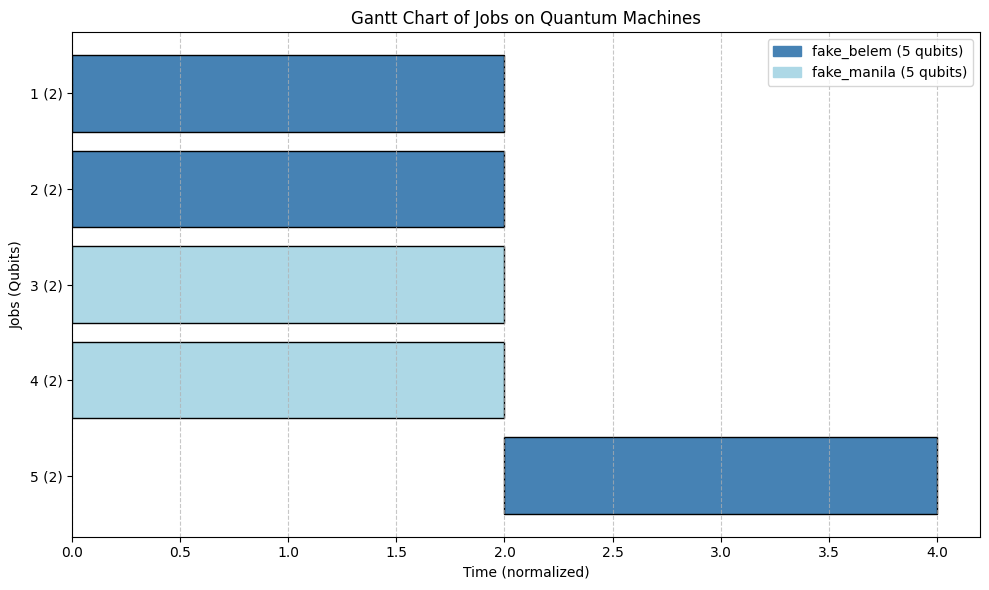

In [6]:
# Visualize data and update to dict
from component.d_scheduling.analyze import analyze_cal
from component.d_scheduling.datawork.visualize import visualize_data
from component.d_scheduling.datawork.updateToDict import update_scheduler_jobs
data = analyze_cal.load_job_data("component/d_scheduling/scheduleResult/heuristic/FFD/schedule.json")
update_scheduler_jobs(data, scheduler_job)
visualize_data(data)

In [7]:
from qiskit import QuantumCircuit, transpile
# Transpile circuits for all scheduled jobs
for job_id, job in scheduler_job.items():
    backend = machines.get(job.machine)
    if backend:
        # Perform transpilation
        # job.circuit.data = [hasChange for hasChange in job.circuit.data if hasChange.operation.name != "qpd_1q"]
        job.transpiled_circuit = transpile(job.circuit, backend, scheduling_method='alap', layout_method='trivial')
        # job.circuit.measure_all()
        # job.transpiled_circuit_measured = transpile(job.circuit, backend, scheduling_method='alap', layout_method='trivial')
    else:
        print(f"No backend found for machine {job.machine}. Skipping job {job_id}.")
        
    job.print()
    
# from qiskit.visualization.timeline import draw, IQXDebugging
# draw(scheduler_job['1'].transpiled_circuit, target=machines['fake_belem'].target)

# after have the circuit we connect to
# from qiskit.visualization import plot_circuit_layout
# plot_circuit_layout(scheduler_job['1'].transpiled_circuit, machines['fake_belem'])

Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 1
Circuit:            ┌───┐
q1_0: ─────┤ X ├
      ┌───┐└─┬─┘
q1_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: fake_belem
Capacity Machine: 5
Start Time: 0.0
Duration: 20.0
End Time: 20.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: global phase: π/4
                ┌────────────────┐                 ┌───┐
     q1_0 -> 0 ─┤ Delay(160[dt]) ├─────────────────┤ X ├
                └──┬─────────┬───┘┌────┐┌─────────┐└─┬─┘
     q1_1 -> 1 ────┤ Rz(π/2) ├────┤ √X ├┤ Rz(π/2) ├──■──
               ┌───┴─────────┴───┐└────┘└─────────┘     
ancilla_0 -> 2 ┤ Delay(3648[dt]) ├──────────────────────
               ├─────────────────┤                      
ancilla_1 -> 3 ┤ Delay(3648[dt]) ├──────────────────────
               ├─────────────────┤                      
ancilla_2 -> 4 ┤ Delay(3648[dt]) ├──────────────────────
               └─────────────────┘                      
Knitted Circuit: None
Transpiled Circuit Measured: 

# Allow multithreading

/tmp/ipykernel_98027/650181084.py:6: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  return circuit.duration


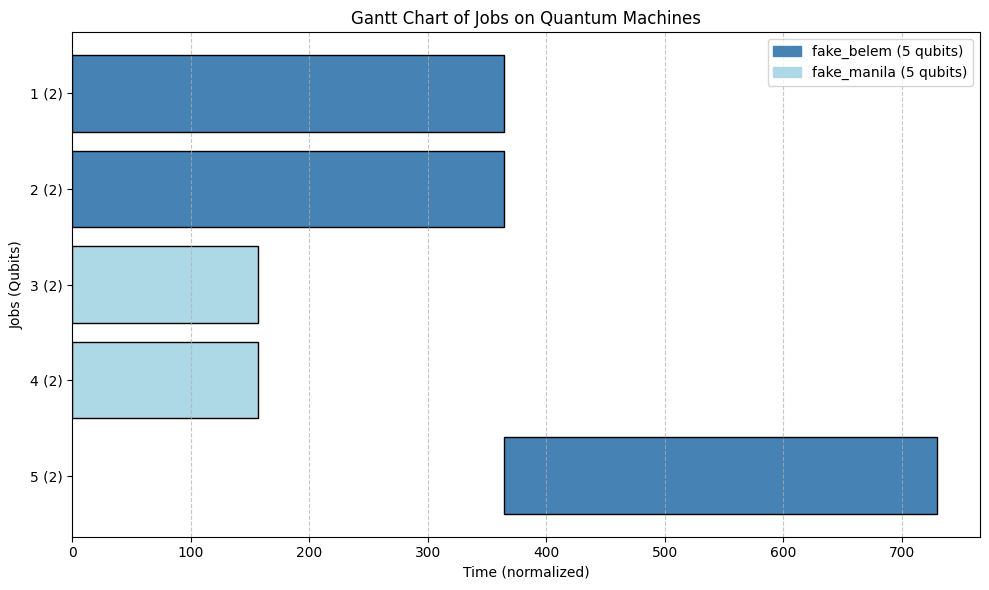

In [8]:
# Define the jobs
jobs = data.copy()

# Generate unique execution times
def get_the_duration_from_transpiled_circuit(circuit):
    return circuit.duration

# Simulate the scheduling with parallel execution support
def simulate_scheduling(jobs):
    machine_schedules = {'fake_belem': [], 'fake_manila': []}  # Track active jobs for each machine
    jobs = sorted(jobs, key=lambda x: x['start'])  # Sort jobs by start time
    for job in jobs:
        machine = job['machine']
        # base_duration = job['duration']
        unique_duration = get_the_duration_from_transpiled_circuit(scheduler_job[job['job']].transpiled_circuit)

        # Find the earliest time the job can start
        current_schedule = machine_schedules[machine]
        start_time = job['start']
        
        # Check for parallel execution
        while True:
            # Filter out completed jobs
            active_jobs = [j for j in current_schedule if j['end'] > start_time]
            
            # Calculate total qubits in use
            total_qubits_in_use = sum(j['qubits'] for j in active_jobs)
            if total_qubits_in_use + job['qubits'] <= job['capacity']:
                # Enough resources are available
                break
            # Increment start_time to the earliest end time of active jobs
            start_time = min(j['end'] for j in active_jobs)

        # Update job start, end times, and duration
        job['start'] = start_time
        job['end'] = start_time + unique_duration
        job['duration'] = unique_duration

        # Add job to the machine's schedule
        current_schedule.append(job)

    return jobs

# Run the simulation
updated_jobs = simulate_scheduling(jobs)

# Print the updated schedule
# for job in updated_jobs:
#     print(job)
visualize_data(updated_jobs)

In [9]:
from qiskit import QuantumCircuit
from collections import defaultdict

def expand_circuit_width(top_circuit: QuantumCircuit, bot_circuit: QuantumCircuit) -> QuantumCircuit:
    """Tensor product (horizontal merge) of two circuits."""
    return top_circuit.tensor(bot_circuit)

def merge_multiple_circuits(circuit_list):
    """Merge a list of circuits horizontally via tensor product."""
    if not circuit_list:
        raise ValueError("Empty circuit list")
    merged_circuit = circuit_list[0]
    for circuit in circuit_list[1:]:
        merged_circuit = expand_circuit_width(merged_circuit, circuit)
    return merged_circuit

# Example: you have circuits per job_id
job_circuits = {}
for job_id, job_info in scheduler_job.items():
    key = job_info.job_name
    
    job_circuits[key] = job_info.circuit


# Group by (machine, start_time)
grouped_jobs = defaultdict(list)
for job in updated_jobs:
    key = (job['machine'], job['start'])
    grouped_jobs[key].append(job['job'])

print("Grouped Jobs:")
for key, job_ids in grouped_jobs.items():
    print(f"{key}: {job_ids}")

# Merge circuits for each (machine, start_time)
expanded_circuits = {}
for (machine, start_time), job_ids in grouped_jobs.items():
    print(job_ids)
    circuits_to_merge = [job_circuits[job_id] for job_id in job_ids]
    print("Circuit_To_Merge")
    print(circuits_to_merge)
    if len(circuits_to_merge) == 1:
        merged_circuit = circuits_to_merge[0]  # no merge needed
    else:
        print(circuits_to_merge)
        merged_circuit = merge_multiple_circuits(circuits_to_merge)
    
    expanded_circuits[tuple(job_ids)] = merged_circuit

print("Expanded Circuits:")
print(expanded_circuits)

for keys, circuit_expand in expanded_circuits.items():
    # print(f"Expanded Circuit for {key}:")
    # print(circuit)
    circuit_expand.measure_all()
    for key in keys:
        # print(f"Job ID: {key}")
        scheduler_job[key].knitted_circuit = circuit_expand

for job_info, job_item in scheduler_job.items():
    print(job_info)
    job_item.print()

Grouped Jobs:
('fake_belem', 0.0): ['1', '2']
('fake_manila', 0.0): ['3', '4']
('fake_belem', 364.8): ['5']
['1', '2']
Circuit_To_Merge
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228bee5f0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef22de813c0>]
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228bee5f0>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef22de813c0>]
['3', '4']
Circuit_To_Merge
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228bbdc30>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228c12260>]
[<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228bbdc30>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228c12260>]
['5']
Circuit_To_Merge
Expanded Circuits:
{('1', '2'): <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228180730>, ('3', '4'): <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7ef228180670>, ('5',): <qiskit.circuit.quantumcirc

In [10]:
from qiskit import QuantumCircuit, transpile
# Transpile circuits for all scheduled jobs
for job_id, job in scheduler_job.items():
    backend = machines.get(job.machine)
    if backend:
        # Perform transpilation
        # job.transpiled_circuit = transpile(job.knitted_circuit, backend, scheduling_method='alap', layout_method='trivial')
        job.transpiled_circuit_measured = transpile(job.knitted_circuit, backend, scheduling_method='alap', layout_method='trivial')
    else:
        print(f"No backend found for machine {job.machine}. Skipping job {job_id}.")
    job.print()
    
# from qiskit.visualization.timeline import draw, IQXDebugging
# draw(scheduler_job['1'].transpiled_circuit, target=machines['fake_belem'].target)

# after have the circuit we connect to
# from qiskit.visualization import plot_circuit_layout
# plot_circuit_layout(scheduler_job['1'].transpiled_circuit, machines['fake_belem'])

Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 1
Circuit:            ┌───┐
q1_0: ─────┤ X ├
      ┌───┐└─┬─┘
q1_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: fake_belem
Capacity Machine: 5
Start Time: 0.0
Duration: 20.0
End Time: 20.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: global phase: π/4
                ┌────────────────┐                 ┌───┐
     q1_0 -> 0 ─┤ Delay(160[dt]) ├─────────────────┤ X ├
                └──┬─────────┬───┘┌────┐┌─────────┐└─┬─┘
     q1_1 -> 1 ────┤ Rz(π/2) ├────┤ √X ├┤ Rz(π/2) ├──■──
               ┌───┴─────────┴───┐└────┘└─────────┘     
ancilla_0 -> 2 ┤ Delay(3648[dt]) ├──────────────────────
               ├─────────────────┤                      
ancilla_1 -> 3 ┤ Delay(3648[dt]) ├──────────────────────
               ├─────────────────┤                      
ancilla_2 -> 4 ┤ Delay(3648[dt]) ├──────────────────────
               └─────────────────┘                      
Knitted Circuit:              ┌───┐ ░ ┌─┐         


# Don't allow multithreading

In [ ]:
import random

# Define the jobs
jobs = data.copy()

# Generate unique execution times
def get_the_duration_from_transpiled_circuit(circuit):
    return circuit.duration

# Simulate the scheduling with parallel execution support
# Simulate the scheduling with parallel execution support
def simulate_scheduling(jobs):
    machine_current = {'fake_belem': [], 'fake_manila': []}  # Track active jobs for each machine
    
    ready_queue = {'fake_belem': [], 'fake_manila': []}  # Jobs ready to be executed on each machine
    
    # update job with unique execution times
    for job in jobs:
        job['duration'] = get_the_duration_from_transpiled_circuit(scheduler_job[job['job']].transpiled_circuit)
        job['end'] = job['start'] + job['duration']
    
    # Schedule jobs on each machine
    jobs_QUITO = [job for job in jobs if job['machine'] == 'fake_belem']
    jobs_MANILA = [job for job in jobs if job['machine'] == 'fake_manila']
    
    current_time_QUITO = 0.0
    current_time_BELEM = 0.0
    current_capacity_QUITO = 5
    current_capacity_BELEM = 5
    
    # Schedule jobs on QUITO machine
    while jobs_QUITO:
        # Check if there are any jobs ready to be executed
        for job in jobs_QUITO[:]:  # Iterate over a copy to allow modification
            if job['start'] <= current_time_QUITO and job['qubits'] <= current_capacity_QUITO:
                ready_queue['fake_belem'].append(job)
                current_capacity_QUITO -= job['qubits']
        
        # Execute jobs in the ready queue in parallel
        if ready_queue['fake_belem']:
            max_end_time = current_time_QUITO
            for job in ready_queue['fake_belem']:
                job['start'] = current_time_QUITO
                job['end'] = job['start'] + job['duration']
                max_end_time = max(max_end_time, job['end'])
                current_capacity_QUITO += job['qubits']
                jobs_QUITO.remove(job)
                machine_current['fake_belem'].append(job)
            ready_queue['fake_belem'] = []
            # Move the current time to the end of the last job in parallel
            current_time_QUITO = max_end_time
        else:
            # If no jobs are ready, move to the next time step
            current_time_QUITO += 1.0
        
    # Schedule jobs on BELEM machine
    while jobs_MANILA:
        # Check if there are any jobs ready to be executed
        for job in jobs_MANILA[:]:  # Iterate over a copy to allow modification
            if job['start'] <= current_time_BELEM and job['qubits'] <= current_capacity_BELEM:
                ready_queue['fake_manila'].append(job)
                current_capacity_BELEM -= job['qubits']
        
        # Execute jobs in the ready queue in parallel
        if ready_queue['fake_manila']:
            max_end_time = current_time_BELEM
            for job in ready_queue['fake_manila']:
                job['start'] = current_time_BELEM
                job['end'] = job['start'] + job['duration']
                max_end_time = max(max_end_time, job['end'])
                current_capacity_BELEM += job['qubits']
                jobs_MANILA.remove(job)
                machine_current['fake_manila'].append(job)
            ready_queue['fake_manila'] = []
            # Move the current time to the end of the last job in parallel
            current_time_BELEM = max_end_time
        else:
            # If no jobs are ready, move to the next time step
            current_time_BELEM += 1.0
    

    return machine_current
        
# Run the simulation
updated_jobs = simulate_scheduling(jobs)
# Print the updated schedule
for machine, scheduled_jobs in updated_jobs.items():
    for job in scheduled_jobs:
        print(job)  

assemble the circuit to have the output in backend and ideal

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
import qiskit.quantum_info as qi
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from component.f_assemble.assemble_work import fidelity_from_counts

aer_simulator = AerSimulator()
for job_name, job_info in scheduler_job.items():
    backend = machines.get(job_info.machine)
    
    if backend:
        transpiled_circuit = job_info.transpiled_circuit_measured
        # print(transpiled_circuit)
        
        # Run the ideal simulation
        ideal_result = aer_simulator.run(transpiled_circuit, shots=1024).result()
        ideal_counts = ideal_result.get_counts(transpiled_circuit)
        
        # Run circuit on the simulated backend
        job = SamplerV2(backend).run([transpiled_circuit], shots=1024)
        sim_result = job.result()[0]
        sim_counts = sim_result.data.meas.get_counts()
        # print("ideal_counts")
        # print(ideal_counts)
        # print("sim_counts")
        # print(sim_counts)
        # Calculate fidelity
        fidelity_val, rho_ideal, rho_sim = fidelity_from_counts(ideal_counts, sim_counts)
        
        # Store the fidelity values
        job_info.fidelity = fidelity_val
        
    # job_info.print()

global phase: π/2
                ┌────────────────┐                          ┌───┐   »
     q2_0 -> 0 ─┤ Delay(160[dt]) ├──────────────────────────┤ X ├───»
                └──┬─────────┬───┘    ┌────┐  ┌─────────┐   └─┬─┘   »
     q2_1 -> 1 ────┤ Rz(π/2) ├────────┤ √X ├──┤ Rz(π/2) ├─────■─────»
               ┌───┴─────────┴───┐    └────┘  └─────────┘           »
     q1_0 -> 2 ┤ Delay(3648[dt]) ├──────────────────────────────────»
               ├─────────────────┤ ┌─────────┐   ┌────┐  ┌─────────┐»
     q1_1 -> 3 ┤ Delay(9216[dt]) ├─┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├»
               ├─────────────────┴┐└─────────┘   └────┘  └─────────┘»
ancilla_0 -> 4 ┤ Delay(35248[dt]) ├─────────────────────────────────»
               └──────────────────┘                                 »
       meas: 4/═════════════════════════════════════════════════════»
                                                                    »
«               ┌─────────────────┐                                   ░ 

In [12]:
utilization_permachine = analyze_cal.calculate_utilization(data)
print(utilization_permachine)

defaultdict(<class 'float'>, {'fake_belem': 0.6000000000000001, 'fake_manila': 0.8})


In [13]:
# Check if have children jobs in origin_job_info
for job_name, job_info in origin_job_info.items():
    if job_info.childrenJobs is not None:
        count_fidelity = 0
        for child_job in job_info.childrenJobs:
            #updata start time and end time from child job to parent job
            job_info.start_time = min(job_info.start_time, child_job.start_time)
            job_info.end_time = max(job_info.end_time, child_job.end_time)
            job_info.duration = job_info.end_time - job_info.start_time
            count_fidelity += child_job.fidelity * child_job.qubits
        job_info.fidelity = count_fidelity / job_info.qubits
    else:
        print(f"Job {job_name} has no children jobs.")

Job 1 has no children jobs.
Job 2 has no children jobs.
Job 3 has no children jobs.
Job 4 has no children jobs.
Job 5 has no children jobs.


In [14]:
metrics = analyze_cal.calculate_metrics(data, utilization_permachine)
analyze_cal.print_metrics(metrics)

result_Schedule.average_turnaroundTime = metrics['average_turnaroundTime']
result_Schedule.average_responseTime = metrics['average_responseTime']
result_Schedule.makespan = metrics['makespan']
result_Schedule.average_utilization = metrics['average_utilization']
result_Schedule.average_throughput = metrics['throughput']

729.6
5
145.92000000000002


In [15]:
for job_name, job_info in origin_job_info.items():
    job_info.print()

Job ID: f7c37729-4629-41ad-8cad-ae414a264f8e
Job Name: 1
Circuit:            ┌───┐
q1_0: ─────┤ X ├
      ┌───┐└─┬─┘
q1_1: ┤ H ├──■──
      └───┘     
Qubits: 2
Machine: fake_belem
Capacity Machine: 5
Start Time: 0.0
Duration: 20.0
End Time: 20.0
Children Jobs: None
Result Cut: None
Transpiled Circuit: global phase: π/4
                ┌────────────────┐                 ┌───┐
     q1_0 -> 0 ─┤ Delay(160[dt]) ├─────────────────┤ X ├
                └──┬─────────┬───┘┌────┐┌─────────┐└─┬─┘
     q1_1 -> 1 ────┤ Rz(π/2) ├────┤ √X ├┤ Rz(π/2) ├──■──
               ┌───┴─────────┴───┐└────┘└─────────┘     
ancilla_0 -> 2 ┤ Delay(3648[dt]) ├──────────────────────
               ├─────────────────┤                      
ancilla_1 -> 3 ┤ Delay(3648[dt]) ├──────────────────────
               ├─────────────────┤                      
ancilla_2 -> 4 ┤ Delay(3648[dt]) ├──────────────────────
               └─────────────────┘                      
Knitted Circuit:              ┌───┐ ░ ┌─┐         


In [16]:
# Calculate all the values of components
sum_fidelity = 0
for job_name, job_info in origin_job_info.items():
    sum_fidelity += job_info.fidelity * job_info.qubits
average_fidelity = sum_fidelity / (result_Schedule.averageQubits * result_Schedule.numcircuit)
result_Schedule.average_fidelity = average_fidelity

In [17]:
print(result_Schedule)

ResultOfSchedule(numcircuit=5, nameAlgorithm='ghz', averageQubits=2.0, nameSchedule='FFD', typeMachine={'fake_belem': 5, 'fake_manila': 5}, average_turnaroundTime=354.56000000000006, average_responseTime=72.96000000000001, average_fidelity=0.855449206938262, sampling_overhead=0.0, average_throughput=145.92000000000002, average_utilization=0.7, scheduler_latency=0.0004127025604248047, makespan=729.6)


In [18]:
import os
import json
from dataclasses import asdict

# Create the directory path
algorithm_folder_path = os.path.join("component", "finalResult","5_5", result_Schedule.nameSchedule, result_Schedule.nameAlgorithm)
os.makedirs(algorithm_folder_path, exist_ok=True)

# Construct the base file name
numcircuit = result_Schedule.numcircuit
numqubit = result_Schedule.averageQubits
base_filename = f"{numcircuit}_{numqubit}"

# Ensure the filename is unique
existing_files = os.listdir(algorithm_folder_path)
matching_files = [f for f in existing_files if f.startswith(base_filename) and f.endswith(".json")]

if not matching_files:
    final_filename = f"{base_filename}_0.json"
else:
    suffixes = [
        int(f.replace(base_filename, "").replace(".json", "").replace("_", ""))
        for f in matching_files
        if f.replace(base_filename, "").replace(".json", "").replace("_", "").isdigit()
    ]
    next_suffix = max(suffixes, default=0) + 1
    final_filename = f"{base_filename}_{next_suffix}.json"

# Define the output file path
output_file_path = os.path.join(algorithm_folder_path, final_filename)

# Save the result to the JSON file
with open(output_file_path, "w") as f:
    json.dump(asdict(result_Schedule), f, indent=4)

# Print the result
print(f"Result saved to {output_file_path}")

Result saved to component/finalResult/5_5/FFD/ghz/5_2.0_1.json


Plot saved to: component/finalResult/FFD/scheduling_metrics_plot.png


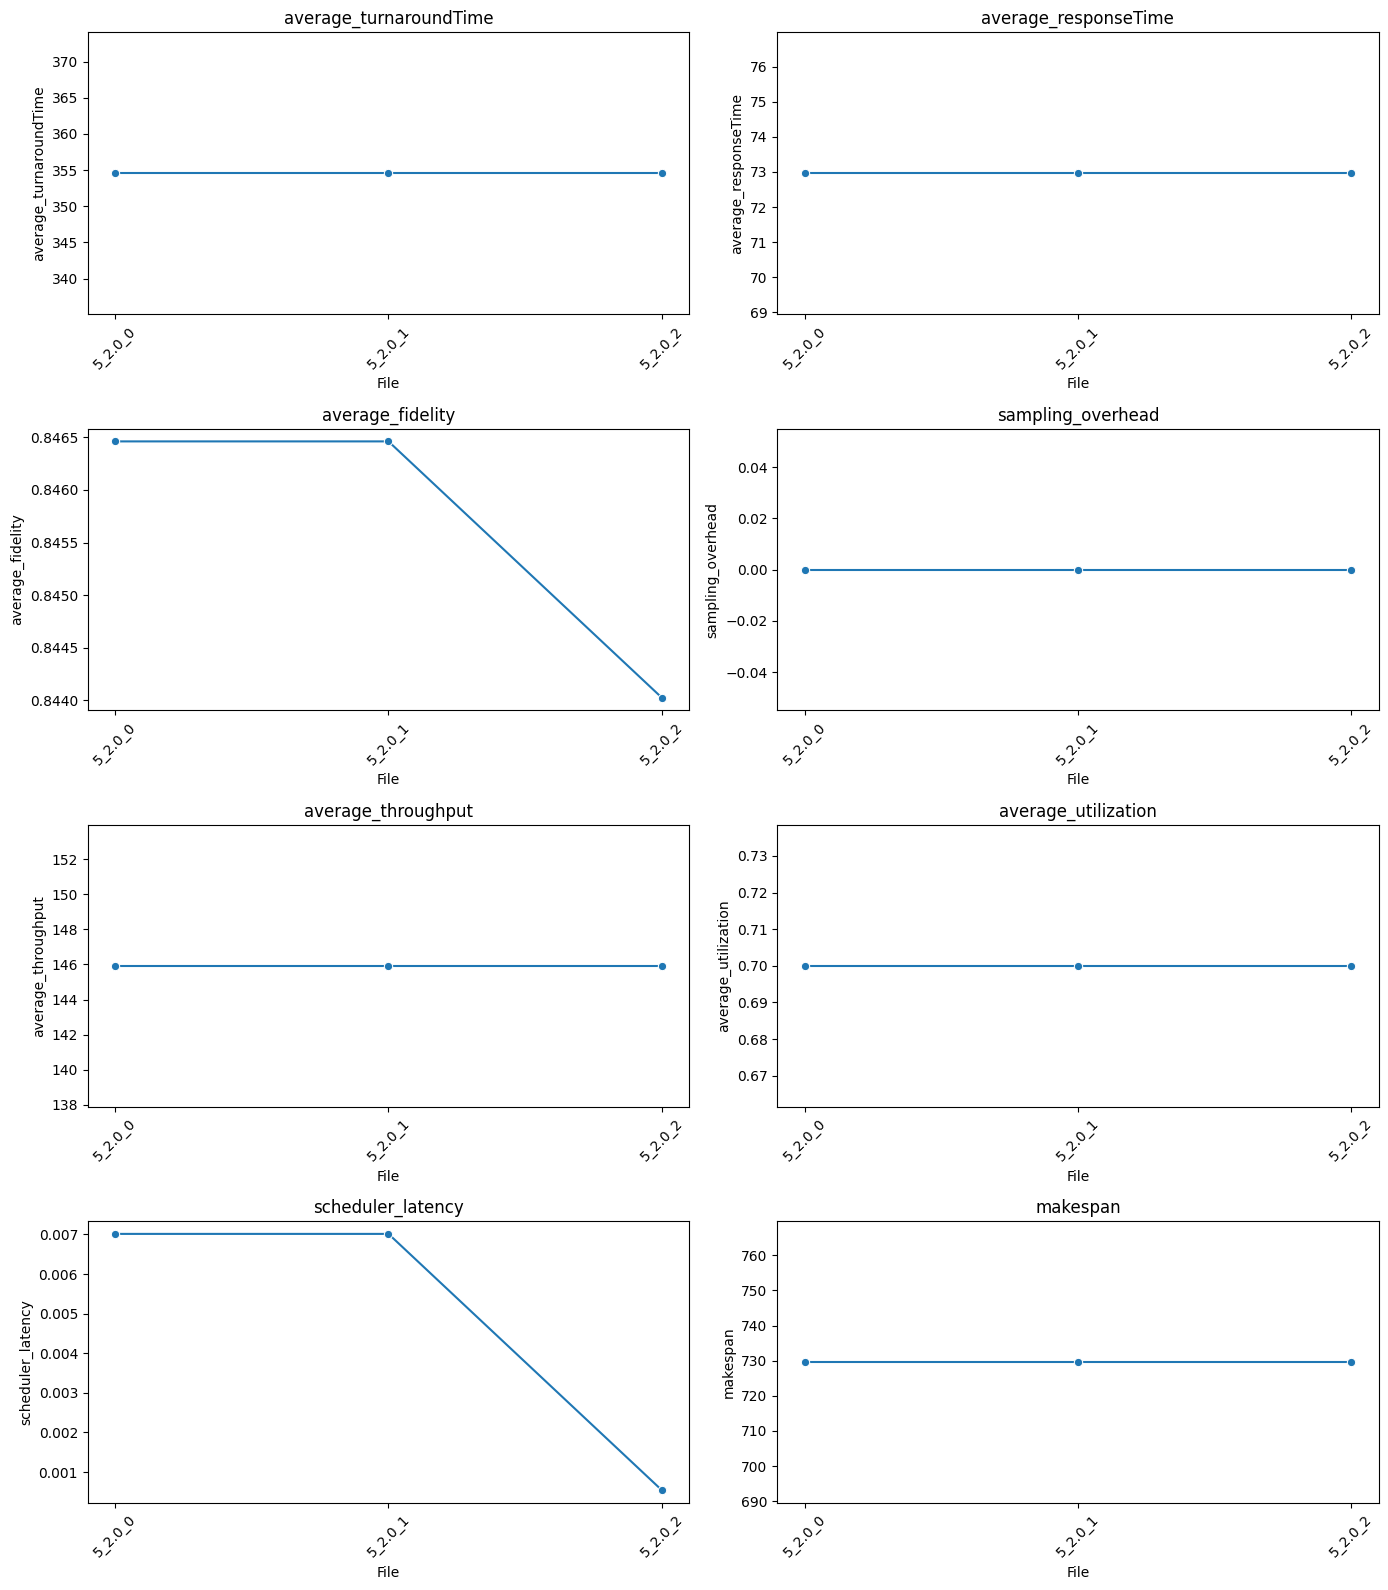

In [19]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math

# Define the folder where your JSON files are stored
folder_path = os.path.join("component", "finalResult", result_Schedule.nameSchedule)

num_circuit = result_Schedule.numcircuit
num_qubits = result_Schedule.averageQubits

# Regex pattern to match filenames like 5_2.0_0.json, 5_2.0_1.json, etc.
pattern = re.compile(rf"{num_circuit}_{num_qubits}_(\d+)\.json")

# Metrics to extract from each JSON file
metrics = [
    "average_turnaroundTime",
    "average_responseTime",
    "average_fidelity",
    "sampling_overhead",
    "average_throughput",
    "average_utilization",
    "scheduler_latency",
    "makespan"
]

# Read data from matching JSON files
data = []
for file in os.listdir(folder_path):
    if pattern.match(file):
        with open(os.path.join(folder_path, file), "r") as f:
            content = json.load(f)
            entry = {metric: content[metric] for metric in metrics}
            entry["filename"] = file
            data.append(entry)

# Convert data to a pandas DataFrame
df = pd.DataFrame(data).sort_values(by="filename")

# Create subplots for each metric
fig, axes = plt.subplots(math.ceil(len(metrics) / 2), 2, figsize=(14, 16))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.lineplot(ax=axes[i], data=df, x=df["filename"].str.replace(".json", "", regex=False), y=metric, marker="o")
    axes[i].set_title(metric)
    axes[i].set_xlabel("File")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust layout and save to PDF
plt.tight_layout()
pdf_output_path = os.path.join(folder_path, "scheduling_metrics_plot.png")
plt.savefig(pdf_output_path)

print(f"Plot saved to: {pdf_output_path}")